In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
data=pd.read_excel("train_agriculture.xlsx", index_col="ID")

In [2]:
data.head(3)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1


In [3]:
data.shape
data.info()
data.dtypes
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4599 entries, F00000001 to F00008083
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 359.3+ KB


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [4]:
data.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [5]:
data.dropna(inplace=True)

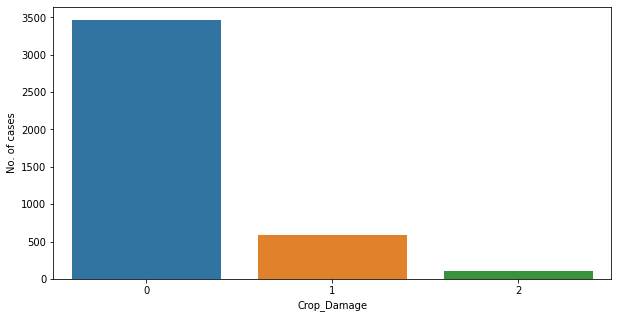

In [6]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data["Crop_Damage"])
plt.xlabel("Crop_Damage")
plt.ylabel("No. of cases")
plt.show()

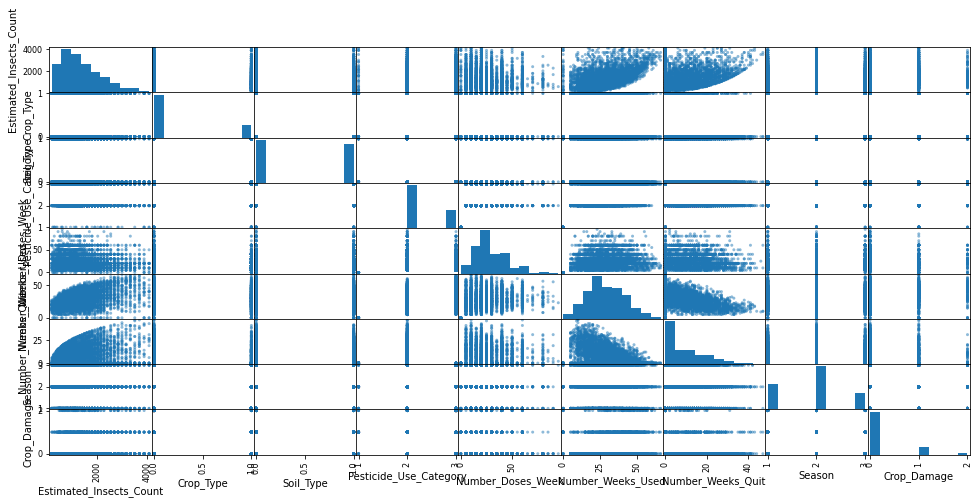

In [7]:
scatter_matrix(data, figsize=(16.5,7.5))
plt.show()

In [8]:
corrmat=data.corr()

<AxesSubplot:>

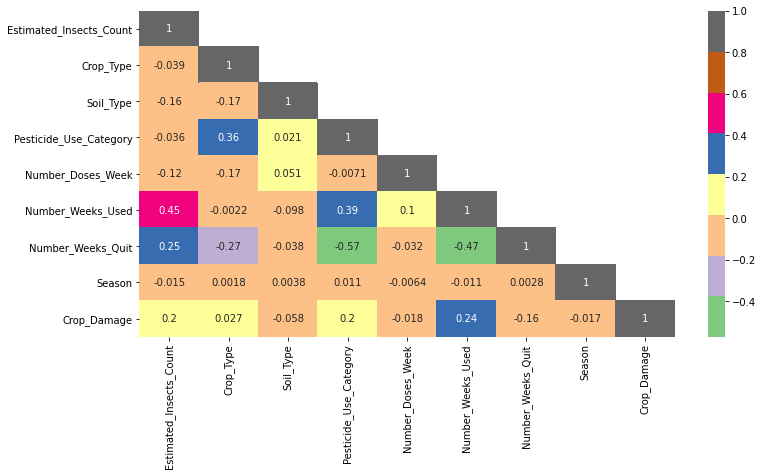

In [9]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

In [10]:
print("Observation: from the scatterplots of the dataset and correlation matrix, we can say, variables like Estimate Insects Count,crop type, pesticide used category, number weeks used are positvely corelated to the dependent variable 'Crop_damage', and other variables like soil type, number doses week, number weeks quit,season are negatively corelated to the target variable 'crop damage',among all the variables 'number weeks used' has higher positive correlation value with 'crop damage'.After that, 'Estimated insects count' & 'pesticide use category' have more impact than other variables.")

Observation: from the scatterplots of the dataset and correlation matrix, we can say, variables like Estimate Insects Count,crop type, pesticide used category, number weeks used are positvely corelated to the dependent variable 'Crop_damage', and other variables like soil type, number doses week, number weeks quit,season are negatively corelated to the target variable 'crop damage',among all the variables 'number weeks used' has higher positive correlation value with 'crop damage'.After that, 'Estimated insects count' & 'pesticide use category' have more impact than other variables.


In [11]:
X=data.drop(columns="Crop_Damage")
y=data.Crop_Damage

In [12]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [13]:
X.skew()

Estimated_Insects_Count   -0.504871
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.429267
Number_Doses_Week         -1.171832
Number_Weeks_Used          0.264944
Number_Weeks_Quit         -0.214533
Season                     0.149567
dtype: float64

In [14]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,Estimated_Insects_Count,131.374603
1,Crop_Type,1.692085
2,Soil_Type,2.038577
3,Pesticide_Use_Category,107.849913
4,Number_Doses_Week,27.056288
5,Number_Weeks_Used,12.948979
6,Number_Weeks_Quit,8.427066
7,Season,8.200710


In [15]:
data.drop(columns=["Estimated_Insects_Count", 'Pesticide_Use_Category'], inplace=True)

In [16]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [17]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [18]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.8461538461538461
mse: 0.17427884615384615
rmse: 0.46383642673816683
*********************************************


for model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) acc_score: 0.8545673076923077
mse: 0.16466346153846154
rmse: 0.45069390943299864
*********************************************


for model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
y_pred=knn.predict(X_test)
print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) acc_score: 0.8064903846153846
mse: 0.20793269230769232
rmse: 0.48659926649538443


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
models=[LogisticRegression(), GaussianNB()]
for mo in models:
    mo.fit(X_train, y_train)
    mo.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", mo,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.8401442307692307
mse: 0.171875
rmse: 0.4426211264032271
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.8401442307692307
mse: 0.171875
rmse: 0.4426211264032271
*********************************************




In [21]:
#Ensemble technique to improve the accuracy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=123)
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, random_state=123)
en=[rf, gdb,adb]
for i in en:
    i.fit(X_train, y_train)
    i.score(X_train, y_train)
    y_pred=i.predict(X_test)
    print("for Ensemble Tech", i, "Accuracy Score:", accuracy_score(y_test,y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()
    print()

for Ensemble Tech RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False) Accuracy Score: 0.8413461538461539
mse: 0.17067307692307693
rmse: 0.4412613040609141


for Ensemble Tech GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={"random_state": range(42,200)}
clf=GridSearchCV(gdb, param_grid)
clf.fit(X_train,y_train)
clf.best_params_

{'random_state': 44}

In [24]:
gdb=GradientBoostingClassifier(random_state=44)
gdb.fit(X_train, y_train)
y_pred=gdb.predict (X_test)
print("for model :", gdb, "acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=44, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) acc_score: 0.8569711538461539
mse: 0.16105769230769232
rmse: 0.4439767838698152


In [26]:
from sklearn.externals import joblib
joblib.dump(gdb, "Crop_damage_predictor.obj")

['Crop_damage_predictor.obj']